In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 로이터 기사 데이터셋 로딩
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(8982,)

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
train_labels[0]

3

In [14]:
# 데이터의 준비

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1

    return results

# 데이터의 변환

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [16]:
# 라벨 데이터의 인코딩 -> 이렇게 해도 되는데, 꼭 안하고 카테고리화만 해도 된다!

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1

        return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [17]:
# categorical 데이터로 변환

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [57]:
# 신경망 구성

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                640064    
                                                                 
 dense_16 (Dense)            (None, 1000)              65000     
                                                                 
 dense_17 (Dense)            (None, 46)                46046     
                                                                 
Total params: 751,110
Trainable params: 751,110
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# 훈련 데이터의 준비

X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [61]:
history = model.fit(partial_X_train, partial_y_train,
    epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.1718 - accuracy: 0.4986 - val_loss: 1.4593 - val_accuracy: 0.6720
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.2136 - accuracy: 0.7197 - val_loss: 1.1816 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 0.9146 - accuracy: 0.7883 - val_loss: 1.0463 - val_accuracy: 0.7710
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6857 - accuracy: 0.8404 - val_loss: 1.0636 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5265 - accuracy: 0.8731 - val_loss: 0.9233 - val_accuracy: 0.8130
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.4009 - accuracy: 0.9044 - val_loss: 1.0413 - val_accuracy: 0.7760
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.3061 - accuracy: 0.9282 - val_loss: 0.9421 - val_accuracy: 0.8110
Epoch 8/20
16

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

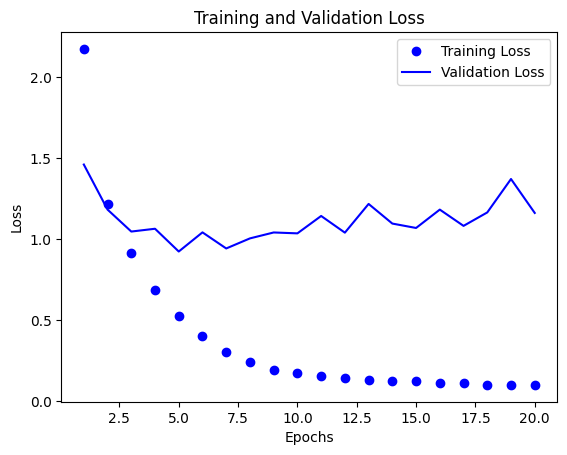

In [63]:
# 결과 시각화

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

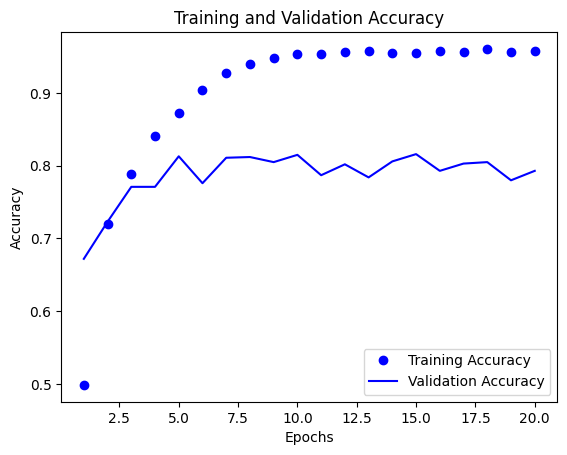

In [64]:
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()